In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [56]:
#Here I am performing an EDA  of the titanic dataset.Mainly trying to figure out the factors that influenced 
#the survival rate by drawing different plots and queries.The main details given in the description are:
#1.On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 
#1502 out of 2224 passengers and crew. Translated 32% survival rate.
#2.Although there was some element of luck involved in surviving the sinking, some groups of people were 
#more likely to survive than others, such as women, children, and the upper-class.

In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [59]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
titanic=pd.concat([train_df,test_df],axis=0,sort=False)
#we will combine both train and test data test to do eda.

In [60]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [62]:
#It is observed from the count that there are null values in Survived,Age,Cabin,Fare and embarked.

In [8]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [9]:
#There are 4 categorical columns:embarked,survived,sex,Pclass.Ticket is a mix of numeric and 
#alphanumeric data types. Cabin is alphanumeric.Numerical:AGE,FARE(continuous),SibSp,Parch(discrete.)

**Derived columns**
#We can derive a new column showing total family members using SibSp,Parch.

In [63]:
titanic['Family']=titanic['SibSp']+titanic['Parch']

In [64]:
titanic[['Family','SibSp','Parch']].head()

,Family,SibSp,Parch
0,1,1,0
1,1,1,0
2,0,0,0
3,1,1,0
4,0,0,0


**Data Imputation**

In [12]:
pd.isnull(titanic).sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Family            0
dtype: int64

In [13]:
#There are lot of null values in Survived,Age,cabin.Let us impute the values for the age column.

In [14]:
titanic[['Age','Pclass']].groupby('Pclass').mean()

,Age
Pclass,
1,39.159930
2,29.506705
3,24.816367


In [15]:
#From the figure it is observed that the mean age of class 1 is 39,class 2 is 29 and class 3 is 25 approximately.

In [16]:
def calc_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29 
        else:
            return 25
    else:
        return Age

In [17]:
titanic['Age']=titanic[['Age','Pclass']].apply(calc_age,axis=1)

**Frequency Analysis of the categorical columns**

In [18]:
titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [19]:
#OUt of 891 people in the sample,we know that 342 has survived.That is a survival rate of 38%.

In [20]:
labels={1:'First class',
       2:'Second class',
       3:'Third class'}
titanic['Pclass']=titanic['Pclass'].replace(labels)
titanic['Pclass'].value_counts()

Third class     709
First class     323
Second class    277
Name: Pclass, dtype: int64

In [21]:
pc=(titanic['Pclass'].value_counts()/titanic.shape[0])*100

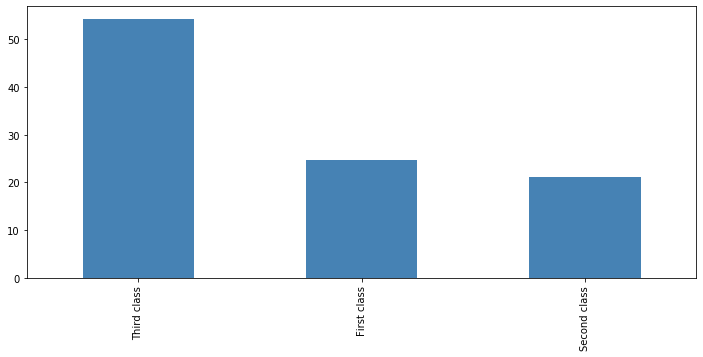

In [22]:
pc.plot.bar(color='steelblue',figsize=(12,5))

In [23]:
#Most people were travelling in third class.

In [24]:
titanic['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [25]:
sc=(titanic['Sex'].value_counts()/titanic.shape[0])

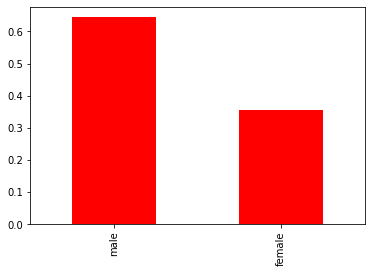

In [26]:
sc.plot.bar(color='red')

In [27]:
#Nearly 65% of the passengers were male.

In [28]:
titanic['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
ec=(titanic['Embarked'].value_counts()/titanic.shape[0])

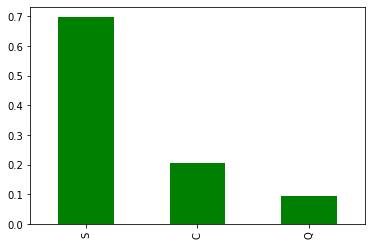

In [30]:
ec.plot.bar(color='green')

In [31]:
#Nearly 70% of the passengers embarked from 'S'

In [32]:
age_bins = [18,30, 60, 90]
labels = {0: 'kids',
          1: 'youth',
          2: 'elders',
          3: 'senior citizen'}
titanic['Age_bin'] = titanic['Age'].apply(lambda v: np.digitize(v, bins=age_bins))
titanic['Age_bin'] = titanic['Age_bin'].replace(labels)
titanic['Age_bin'].value_counts()

youth             639
elders            476
kids              154
senior citizen     40
Name: Age_bin, dtype: int64

**Numerical vs Categorical**

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


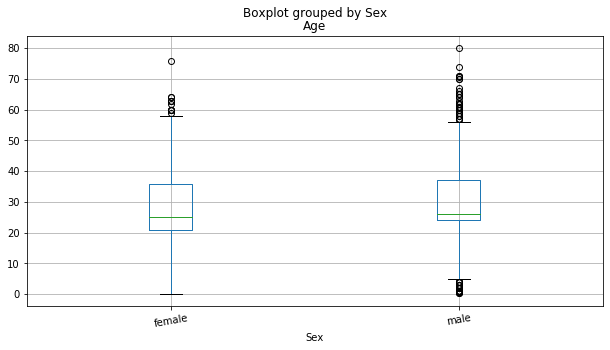

In [33]:
#Age vs sex
titanic.boxplot('Age',by='Sex',figsize=(10,5),rot=10)

In [34]:
titanic[['Age','Sex']].groupby('Sex').mean()

,Age
Sex,
female,28.402554
male,29.853001


In [35]:
#We can see that the average age of both male and female passengers lie between 28-30.There are a number 
#of ouliers representing elder citizens.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


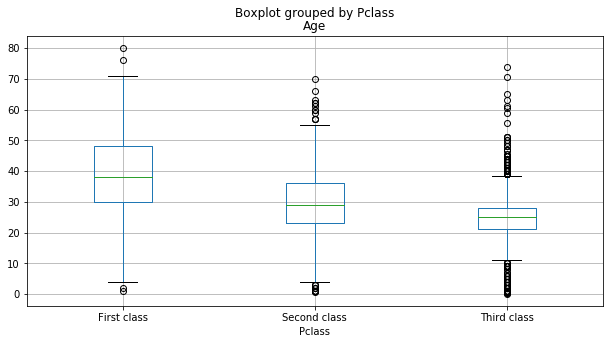

In [36]:
#Age vs class
titanic.boxplot('Age',by='Pclass',figsize=(10,5))

In [37]:
titanic[['Age','Pclass']].groupby('Pclass').mean()

,Age
Pclass,
First class,39.019876
Second class,29.477437
Third class,24.870240


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


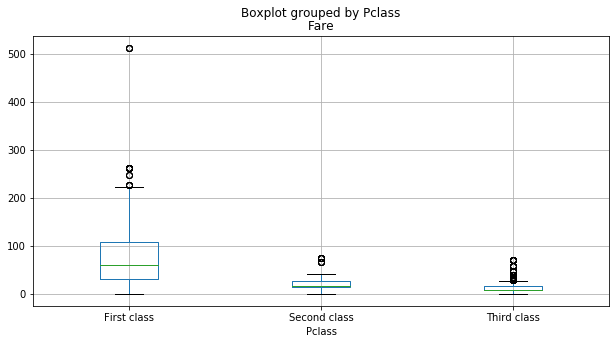

In [38]:
#Fare vs class
titanic.boxplot('Fare',by='Pclass',figsize=(10,5))

In [39]:
titanic[['Fare','Pclass']].groupby('Pclass').mean()

,Fare
Pclass,
First class,87.508992
Second class,21.179196
Third class,13.302889


In [40]:
#First class tickets are very costly compared to third class as expected.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


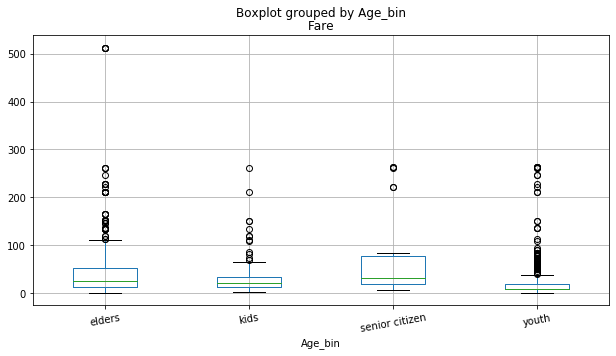

In [41]:
#Fare vs Agebin
titanic.boxplot('Fare',by='Age_bin',figsize=(10,5),rot=10)

In [42]:
titanic[['Fare','Age_bin']].groupby('Age_bin').mean()

,Fare
Age_bin,
elders,45.712753
kids,31.577219
senior citizen,64.441990
youth,22.558822


In [43]:
#Fare is mainly dependent on the class than the age.

**Numerical vs Numerical**

In [44]:
titanic[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.198392
Fare,0.198392,1.000000


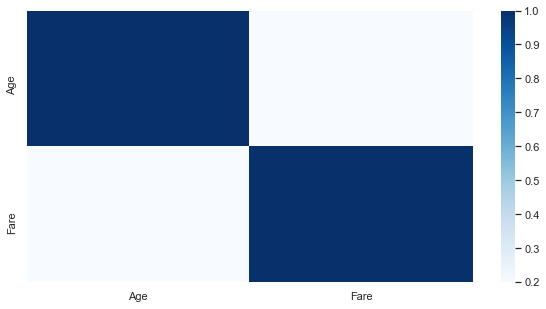

In [45]:
sns.set(rc={'figure.figsize':(10,5)})
p = sns.heatmap(titanic[['Age','Fare']].corr(), cmap='Blues')

In [46]:
#Correlation does not exist between age and fare.

**Categorical vs categorical**

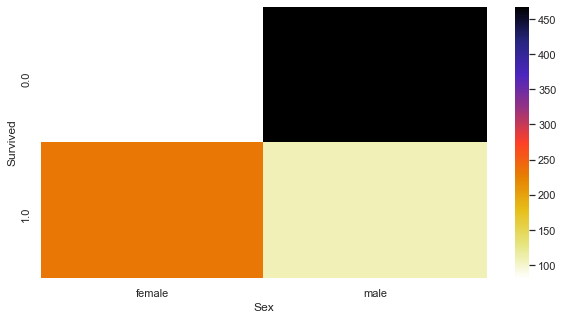

In [47]:
#Survived vs Sex
obs = titanic.groupby(['Survived', 'Sex']).size()
obs.name = 'Freq'
obs = obs.reset_index()
obs = obs.pivot_table(index='Survived', columns='Sex',
                values='Freq')
sns.heatmap(obs, cmap='CMRmap_r')

In [48]:
titanic[['Survived','Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [49]:
#The survival rate is high in females and very low in males.

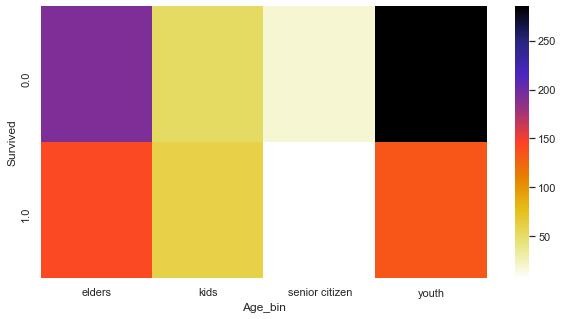

In [50]:
#Survived vs Age
obs = titanic.groupby(['Survived', 'Age_bin']).size()
obs.name = 'Freq'
obs = obs.reset_index()
obs = obs.pivot_table(index='Survived', columns='Age_bin',
                values='Freq')
sns.heatmap(obs, cmap='CMRmap_r')

In [51]:
titanic[['Survived','Age_bin']].groupby('Age_bin').mean().reset_index().sort_values(by='Survived',ascending=False)

,Age_bin,Survived
1,kids,0.539823
0,elders,0.422156
3,youth,0.318182
2,senior citizen,0.269231


In [52]:
#Survival rate is highest in kids and least in senior citizens.

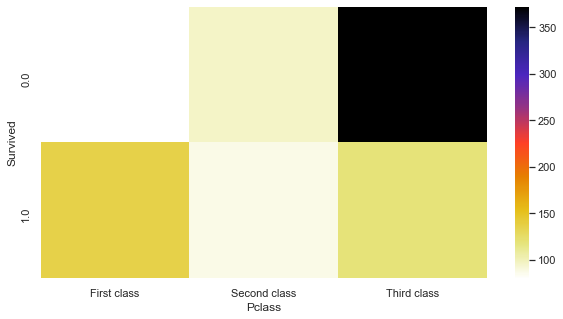

In [53]:
##Survived vs Class
obs = titanic.groupby(['Survived', 'Pclass']).size()
obs.name = 'Freq'
obs = obs.reset_index()
obs = obs.pivot_table(index='Survived', columns='Pclass',
                values='Freq')
sns.heatmap(obs, cmap='CMRmap_r')

In [54]:
titanic[['Survived','Pclass']].groupby('Pclass').mean().reset_index().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,First class,0.629630
1,Second class,0.472826
2,Third class,0.242363


In [ ]:
#First class people has the highest survival rate.